In [1]:
cd downloads

C:\Users\Rajesh\downloads


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.util.testing import assert_frame_equal

C:\Users\Rajesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
train=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [7]:
train.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


this data has 12043 records and 23 parameters. the data type of the parameters are different. some are text while extraction is data time. we have 92 days of trasaction details

# lets look at the features first
* status -whether the transaction was authorised or not
* card_present_flag - whether the transaction was done through card or online payment etc
* bpay biller code - it gives info of the transaction done through bpay
* account - gives account details
* currency -(australian dollars)
* long_lat - latituse and longitude
* txn_description - transaction description
* merchent_id - where the person transferred the money
* first_name - name of the person
* date - of the transaction
* gender & age
* merchant_sururb - the merchant street
* merchant_state - state it belongs to 
* extraction - 
* amount - AUD given to purchase any goods
* transaction_id - unique id for refernce of the trasaction
* country - australia
* customer_id - for the merchant who keeps the record for the transaction
* merchant_long_lat - location of mrchant
* movement - whether used debit or credit card

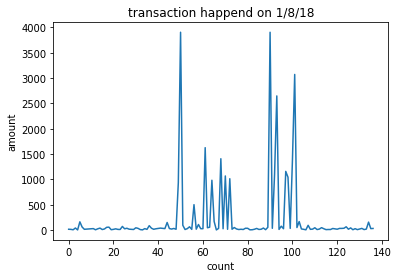

In [11]:
plt.plot(train.groupby('date').get_group('2018-08-01')['amount'])
plt.ylabel("amount")
plt.xlabel("count")
plt.title("transaction happend on 1/8/18")
plt.show()
# in one day there were 137 transaction most of them were in the range of 0-400 but there are some 
# heavy transaction that took place.

In [12]:
dd=train.groupby(pd.Grouper(key="date"))['amount'].mean()

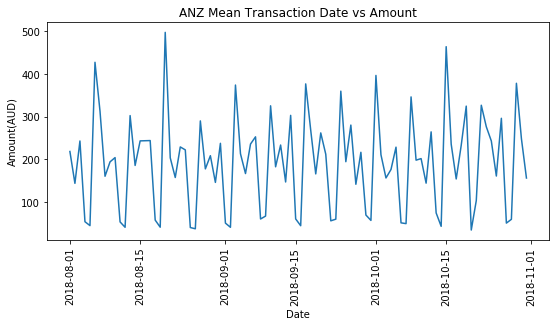

In [15]:
plt.figure(figsize=(9,4))
plt.xticks(rotation=90)
plt.plot(dd)
plt.title("ANZ Mean Transaction Date vs Amount")
plt.xlabel("Date")
plt.ylabel("Amount(AUD)")
plt.show()
#from this graph we can see that average of 100-300 AUD people spend everyday

In [16]:
#let us see how many transaction happeded each day and how to related it with weekdays
date_f=train.groupby('date').count()

In [17]:
trans_cnt = date_f["customer_id"].mean()
n_points = len(date_f.index)

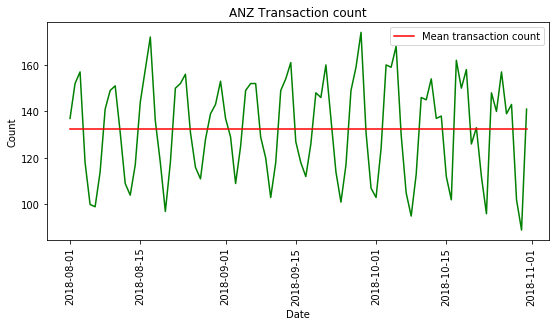

In [18]:
plt.figure(figsize=(9,4))
plt.plot(date_f['status'],color='g')
plt.plot(date_f.index, np.linspace(trans_cnt,trans_cnt,n_points), c="r", label = "Mean transaction count")
plt.title("ANZ Transaction count")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

In [19]:
date_f=train.groupby('date').sum()

In [20]:
date_f['Month'] = date_f.index.month
date_f['Weekday'] = date_f.index.weekday

In [21]:
week=date_f.groupby(pd.Grouper(key="Weekday"))['amount'].mean()

In [22]:
week=week.rename(index={0:'monday',1:'tuesday',2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'})

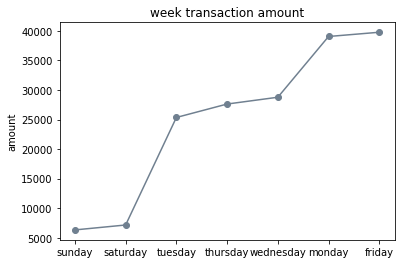

In [29]:
plt.plot(week.sort_values(),marker='o',color='slategrey')#black friday sale and monday shopping challenge
plt.title("week transaction amount")
plt.ylabel("amount")
plt.show()

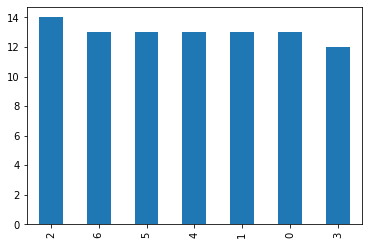

In [13]:
date_f['Weekday'].value_counts().plot(kind='bar')#almost all the days the trancations were same

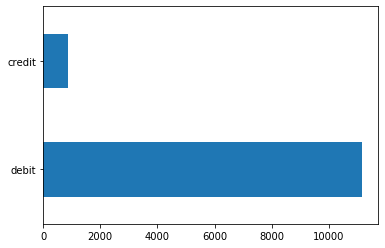

In [5]:
train['movement'].value_counts().plot(kind='barh')

In [22]:
dates=train[train['movement']=='credit']['date'].value_counts()

In [36]:
dates=train.groupby('date')['movement'].count()

In [30]:
date_f.head()

,card_present_flag,merchant_code,balance,age,amount,Month,Weekday
date,,,,,,,
2018-08-01,63.0,0.0,1360954.62,4142,29867.94,8,2
2018-08-02,85.0,0.0,2122469.92,4787,21786.32,8,3
2018-08-03,79.0,0.0,1599482.51,4985,38096.58,8,4
2018-08-04,74.0,0.0,968403.51,3662,6296.05,8,5
2018-08-05,54.0,0.0,1329752.54,2991,4426.50,8,6


In [31]:
week=date_f.groupby(pd.Grouper(key="Month"))['amount'].sum()
week=week.rename(index={1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'jun',7:'july',8:'aug',9:'sep',10:'oct',11:'nov'})

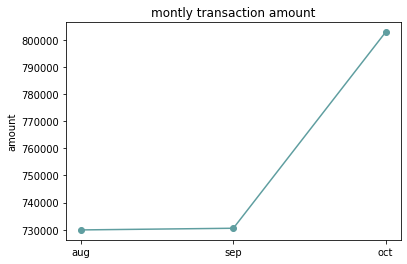

In [32]:
plt.plot(week.sort_values(),marker='o',color='cadetblue')#black friday sale and monday shopping challenge
plt.title("montly transaction amount")
plt.ylabel("amount")
plt.show()

In [55]:
date_f[date_f['Month']==8]['amount'].sum() #total amount in august

729935.5200000001

In [56]:
date_f[date_f['Month']==9]['amount'].sum() #total amount in september

730550.21

In [57]:
date_f[date_f['Month']==10]['amount'].sum() #total amount in october

802798.4699999997

* “winter is coming!” And October is the perfect time to stock up on winter coats and other cold weather clothes. You’ll have tons of sizes and styles to choose from this month, and prices will be pretty good too. (Prices will drop again in the spring, but you’ll be picking through the leftovers if you wait that long!)

* National Taco Day is coming up on October 4th, so keep an eye out for free or discounted tacos that day at your favorite taco joint!

* October is the time of festivities in Australia. Get ready to attend back to back fests and events on your holiday in Australia. Gorge on lip-smacking food at Crave Sydney International Food Festival, and dance to good music at Melbourne Festival. Smell the fragrance of thousand beautiful roses at Renmark Rose Festival in Adelaide and experience the island culture at Island Vibe Festival Queensland.

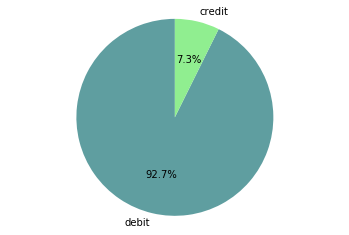

In [104]:
#import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels ='debit','credit'
sizes = train['movement'].value_counts()[0],train['movement'].value_counts()[1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=False, startangle=90,colors=['cadetblue','lightgreen'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [33]:
import datetime

In [34]:
frame = pd.to_datetime(train['date'], dayfirst = True) 
frame = pd.DataFrame([frame]).transpose() 
frame['date']= frame 
frame['month']= frame['date'].dt.month 
#frame.drop(0, axis = 1, inplace = True) 
  
frame

,date,month
0,2018-08-01,8
1,2018-08-01,8
2,2018-08-01,8
3,2018-08-01,8
4,2018-08-01,8
...,...,...
12038,2018-10-31,10
12039,2018-10-31,10
12040,2018-10-31,10
12041,2018-10-31,10


In [35]:
train['month']=frame['month']

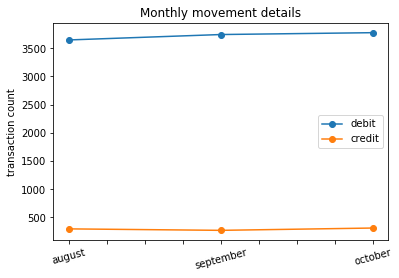

In [33]:
data = {"debit":[train[train['month']==8]['movement'].value_counts()[0], train[train['month']==9]['movement'].value_counts()[0],train[train['month']==10]['movement'].value_counts()[0] ],

        "credit":[train[train['month']==8]['movement'].value_counts()[1], train[train['month']==9]['movement'].value_counts()[1], train[train['month']==10]['movement'].value_counts()[1]]

        };
index     = ["august", "september", "october"];
dataFrame = pd.DataFrame(data=data, index=index);
dataFrame.plot(rot=15, title="Monthly movement details",marker='o');
plt.ylabel("transaction count")
plt.show(block=True);

In [ ]:
data = {"debit":[[train[train['month']==8]['movement']=='debit']['amount'].mean(), train[train['month']==9]['movement'].value_counts()[0],train[train['month']==10]['movement'].value_counts()[0] ],

        "credit":[train[train['month']==8]['movement'].value_counts()[1], train[train['month']==9]['movement'].value_counts()[1], train[train['month']==10]['movement'].value_counts()[1]]

        };
index     = ["august", "september", "october"];
dataFrame = pd.DataFrame(data=data, index=index);
dataFrame.plot(rot=15, title="Monthly movement details",marker='o');
plt.ylabel("transaction count")
plt.show(block=True);

In [46]:
x=train.groupby(pd.Grouper(key='movement'))['amount'].mean()

In [52]:
x.to_frame().style.background_gradient(cmap='BuPu')

,amount
movement,
debit,52.572343
credit,1898.728029


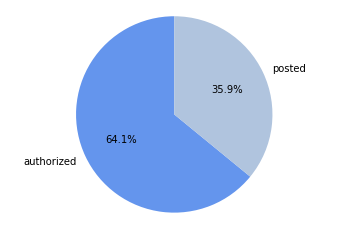

In [120]:
labels =train['status'].unique()
sizes = train['status'].value_counts()[0],train['status'].value_counts()[1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=False, startangle=90,colors=['cornflowerblue','lightsteelblue'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [114]:
train['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

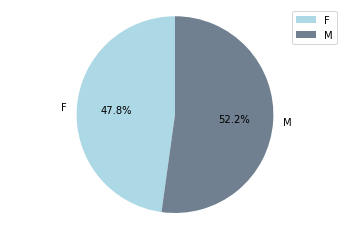

In [54]:
labels =train['gender'].unique()
sizes = train['gender'].value_counts()[1],train['gender'].value_counts()[0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=False, startangle=90,colors=['lightblue','slategrey'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

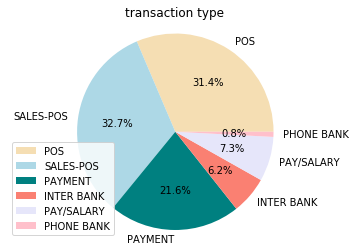

In [87]:
labels =train['txn_description'].unique()
sizes = train['txn_description'].value_counts()[1],train['txn_description'].value_counts()[0],train['txn_description'].value_counts()[2],train['txn_description'].value_counts()[4],train['txn_description'].value_counts()[3],train['txn_description'].value_counts()[5]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=False, startangle=0,colors=['wheat','lightblue','teal','salmon','lavender','pink'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend( loc='lower left')
plt.title("transaction type")
plt.show()

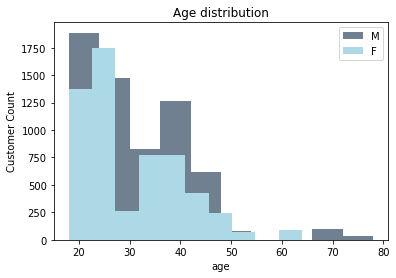

In [53]:
plt.hist(train[train['gender']=='M']['age'],color = "slategrey",label='M')
plt.hist(train[train['gender']=='F']['age'],color = "lightblue",label='F')
plt.xlabel("age")
plt.ylabel("Customer Count")
plt.title("Age distribution")
plt.legend()
plt.show()

In [25]:
train.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [15]:
train.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [27]:
train['merchant_id'].nunique() #there are 5725 merchants

5725

In [5]:
train['merchant_state'].replace('')

True

In [56]:
df=train['merchant_state'].value_counts()

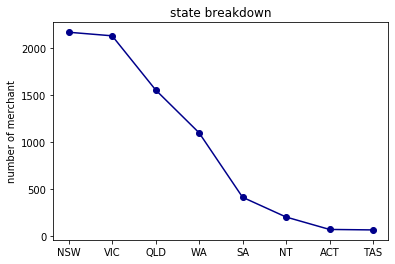

In [59]:
plt.plot(df,marker='o',color='darkblue')
plt.title("state breakdown")
plt.ylabel("number of merchant")
plt.show()

In [60]:
df.to_frame().style.background_gradient(cmap='Blues')

,merchant_state
NSW,2169
VIC,2131
QLD,1556
WA,1100
SA,415
NT,205
ACT,73
TAS,68


In [17]:
pip install gmplot

Note: you may need to restart the kernel to use updated packages.


In [18]:
import gmplot

In [61]:
cd Australian States Shapefile

C:\Users\Rajesh\downloads\Australian States Shapefile


In [62]:
import geopandas as gpd

In [63]:
maps=gpd.read_file('States Map.shp')

In [64]:
maps.head(7)

,NAME,AREA,TOTPOP_CY,ISO_SUB,geometry
0,New South Wales,8.008125e+05,7636734,NSW,"MULTIPOLYGON (((153.57935 -28.19667, 153.57909..."
1,Victoria,2.274957e+05,6067481,VIC,"MULTIPOLYGON (((146.29448 -39.15607, 146.29586..."
2,Queensland,1.730169e+06,4723481,QLD,"MULTIPOLYGON (((153.41226 -27.93130, 153.41622..."
3,South Australia,9.842818e+05,1736737,SA,"MULTIPOLYGON (((140.66283 -38.06212, 140.66231..."
4,Western Australia,2.526646e+06,2645244,WA,"MULTIPOLYGON (((117.86946 -35.18512, 117.86934..."
5,Tasmania,6.801751e+04,488994,TAS,"MULTIPOLYGON (((146.37219 -43.74048, 146.37127..."
6,Northern Territory,1.348088e+06,249778,NT,"MULTIPOLYGON (((137.07437 -15.85575, 137.07226..."


In [10]:
type(maps)

geopandas.geodataframe.GeoDataFrame

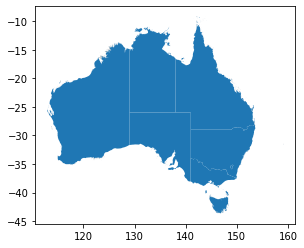

In [65]:
maps.plot()

In [66]:
from shapely.geometry import Point,Polygon

In [67]:
g=train[train['merchant_long_lat'].isnull()==False]['merchant_long_lat']

In [68]:
df_lon=[]
for i in g:
    x=str(i)
    df_lon.append(float(x.split()[0]))
    

In [69]:
df_lat=[]
for i in g:
    x=str(i)
    df_lat.append(float(x.split()[1]))
    

In [70]:
geo=[Point(xy) for xy in  zip(df_lon,df_lat)]

In [71]:
g=gpd.GeoDataFrame(geometry=geo)

(110.61171196745012,
 161.41855573755007,
 -45.47039038599994,
 -7.412397247999962)

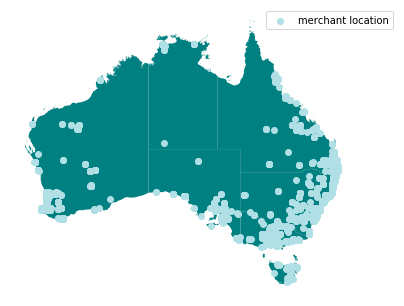

In [73]:
fig,ax=plt.subplots(figsize=(7,7))
maps.plot(ax=ax,color='teal')
g.plot(ax=ax,color='powderblue',label='merchant location')
plt.legend()
plt.axis('off')

In [74]:
train[train['merchant_state']=='NT']['amount'].sum()

9168.89

In [75]:
train[train['merchant_state']=='NSW']['amount'].sum()

102021.76999999999

In [85]:
i=[]
print("   amount    ")
print("   ------    ")
for j in train['merchant_state'].unique():
       print(j,round(train[train['merchant_state']==j]['amount'].sum()),sep='   ')

   amount    
   ------    
QLD   53483.0
NSW   102022.0
nan   0.0
VIC   87584.0
WA   33992.0
SA   16777.0
NT   9169.0
TAS   1963.0
ACT   4877.0


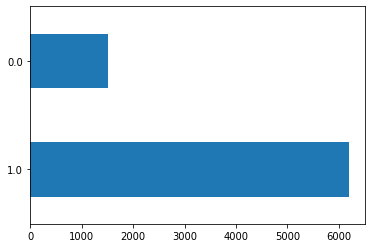

In [90]:
x=train.groupby(pd.Grouper(key='gender'))['card_present_flag'].value_counts()

In [94]:
x.to_frame().style.background_gradient(cmap='BuPu')

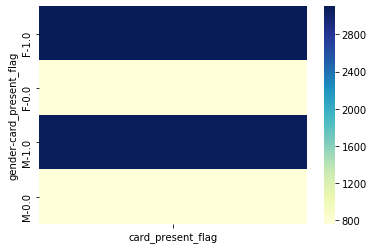

In [96]:
sns.heatmap(x.to_frame(),cmap='YlGnBu')